In [1]:
from scipy.integrate import odeint as ode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dados dimensionais:

M = 20
m = 2 
R = 0.4
L = 0.4
g = 10

P = 2*(M+m)*g

# inclui o array parameters:

parameters = [M, m, R, L, g]

# dados do motor e dos mancais:

T0 = 10
k = 0.1
q = 1

# condições iniciais

theta0 = 0
omega0 = 0.0

y = [theta0, omega0]

# distância (G-A):

xg = 0
yg = (3*m*L)/(4*(M+m))
zg = (6*M*L + 3*m*L)/(4*(M+m))

# momentos de inércia e produtos de inércia

Jz = M*(R**2) + ((4*m*(L**2))/3)
Jyz = m*(L**2)

In [3]:
# function torque de acionamento

def functionT(w):
  if w > (T0/k):
    return 0

  T = T0 - k*w
  return T

In [4]:
# function torque resistivo

def functionQ(w):
  if w > 100:
    return 0
    
  Q = -q*w
  return Q

In [5]:
ay = []

As equações abaixo:

Para a reação em A:
$$
    Ay = 2*(M+m)*(g*(1 - Zg) - Yg*(\dot{\theta} ^2*cos\theta + \ddot{\theta}*sin\theta))
$$

$$
    Az = 0
$$

Para a EDO:

$$
     \ddot{\theta} = \frac{T(\dot{\theta}) + Q(\dot{\theta}) + P*Yg*sin(\theta)}{Jz}
$$

In [6]:
def function_omega(y, interval, parameters):

  ydot = [0, 0]

  value = ((P/g)*(g*(1-zg) - yg*((y[1]**2)*np.cos(y[0]) + ydot[1]*np.sin(y[0]))))

  ydot[0] = y[1]
  ydot[1] = (P*yg*np.sin(y[0]) + functionT(y[1]) + functionQ(y[1]))/(Jz)
  
  ay.append(value)

  return ydot

In [7]:
# intervalo

ti = 0.
tf = 30
h = 0.01

interval = np.arange(ti, tf, h)

In [8]:
Y = ode(function_omega, y, interval, args=(parameters,))

In [9]:
len(Y[:, 0])
len(ay)

2707

In [10]:
Xn = Y[:, 0]
Vn = Y[:, 1]

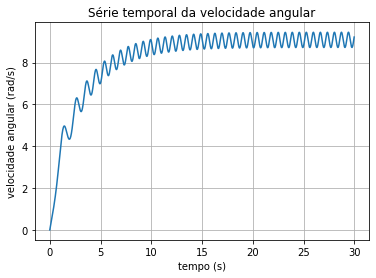

In [11]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

In [12]:
# intervalo

ti = 0.
tf = 27.07
h = 0.01

interval = np.arange(ti, tf, h)

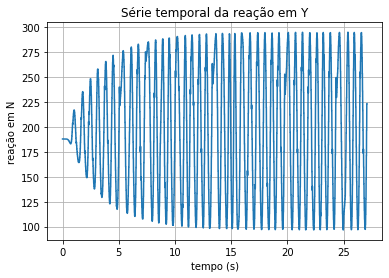

In [13]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()